In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import ast

df = pd.read_csv("data_file.csv")




In [5]:
import pandas as pd

# Assuming df is the DataFrame with 'right_eye_pos' and 'left_eye_pos' columns

# Function to split the coordinate string and convert to float
def split_coordinates(coord_str):
    # Remove parentheses and split by comma
    coord_str = coord_str.strip("()")
    x, y, z = coord_str.split(",")
    return float(x), float(y), float(z)

# Apply the function to split 'right_eye_pos' and 'left_eye_pos' into separate columns
df[['eyeR_x', 'eyeR_y', 'eyeR_z']] = df['right_eye_pos'].apply(lambda pos: pd.Series(split_coordinates(pos)))
df[['eyeL_x', 'eyeL_y', 'eyeL_z']] = df['left_eye_pos'].apply(lambda pos: pd.Series(split_coordinates(pos)))

# Drop the original 'right_eye_pos' and 'left_eye_pos' columns if no longer needed
df.drop(['right_eye_pos', 'left_eye_pos'], axis=1, inplace=True)

# Show the updated DataFrame
print(df.head())


   frame      timestamp                                           head_dir  \
0      0  1700803147247  (0.05051257088780403, 0.21452489495277405, -0....   
1      5  1700803147547  (0.048322759568691254, 0.21519285440444946, -0...   
2     10  1700803147610  (0.047705505043268204, 0.21532541513442993, -0...   
3     15  1700803147680  (0.04748426750302315, 0.21542847156524658, -0....   
4     20  1700803147744  (0.0473632887005806, 0.21617968380451202, -0.0...   

                                            head_pos  \
0  (0.09682547301054001, 0.04312456399202347, -0....   
1  (0.09551570564508438, 0.04284469410777092, -0....   
2  (0.09519070386886597, 0.042751457542181015, -0...   
3  (0.0949229896068573, 0.04271567985415459, -0.3...   
4  (0.09450651705265045, 0.04271329194307327, -0....   

                                            head_vel  \
0  (-0.0028229933232069016, -0.001799439662136137...   
1  (-0.004357140511274338, -0.0007592292968183756...   
2  (-0.004576926585286856,

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


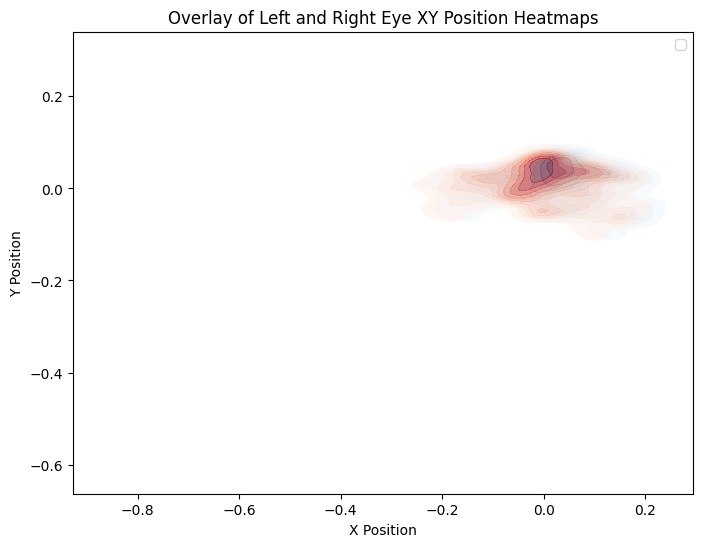

In [7]:
import seaborn as sns
# Overlay left and right eye XY projection heatmaps
plt.figure(figsize=(8, 6))
sns.kdeplot(x=df['eyeL_x'], y=df['eyeL_y'], fill=True, cmap="Blues", alpha=0.5, label='Left Eye')
sns.kdeplot(x=df['eyeR_x'], y=df['eyeR_y'], fill=True, cmap="Reds", alpha=0.5, label='Right Eye')
plt.title('Overlay of Left and Right Eye XY Position Heatmaps')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.show()


In [9]:
def unpack_coordinates(pos_tuple):
    return pd.Series(pos_tuple)

# Apply the function to split 'head_pos' into separate columns
df[['head_x', 'head_y', 'head_z']] = df['head_pos'].apply(unpack_coordinates)

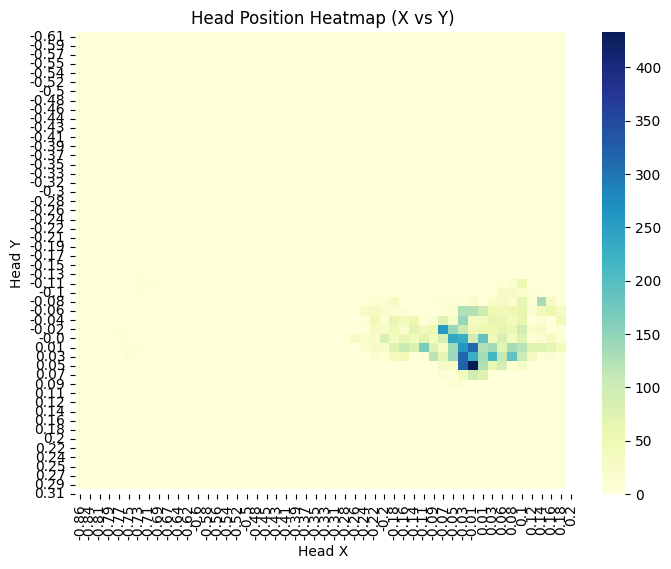

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract head_x and head_y data
head_x = df['head_x']
head_y = df['head_y']

# Create a 2D histogram with a specified number of bins
heatmap_data, xedges, yedges = np.histogram2d(head_x, head_y, bins=50)

# Plot heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data.T,  # Transpose to match x/y axes
            xticklabels=np.round(xedges, 2),  # Customize tick labels
            yticklabels=np.round(yedges, 2),
            cmap='YlGnBu',  # Use a color map
            cbar=True)

plt.title('Head Position Heatmap (X vs Y)')
plt.xlabel('Head X')
plt.ylabel('Head Y')
plt.show()


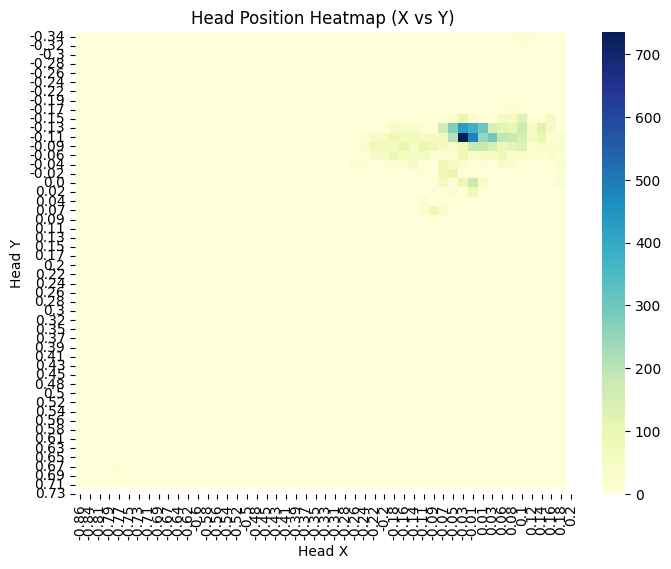

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract head_x and head_y data
head_x = df['head_x']
head_y = df['head_y']
head_z = df['head_z']

# Create a 2D histogram with a specified number of bins
heatmap_data, xedges, yedges = np.histogram2d(head_x, head_z, bins=50)

# Plot heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data.T,  # Transpose to match x/y axes
            xticklabels=np.round(xedges, 2),  # Customize tick labels
            yticklabels=np.round(yedges, 2),
            cmap='YlGnBu',  # Use a color map
            cbar=True)

plt.title('Head Position Heatmap (X vs Y)')
plt.xlabel('Head X')
plt.ylabel('Head Y')
plt.show()
